# Parte 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

[[0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.9 0.7 0.9 1.  0.  0. ]
 [0.  0.  0.8 0.6 1.  0.6 0.8 0.  0. ]
 [0.  0.  0.7 1.  1.  0.8 1.  0.  0. ]
 [0.  0.  1.  0.3 0.8 1.  0.9 0.  0. ]
 [0.  0.  0.9 0.9 0.7 0.9 1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


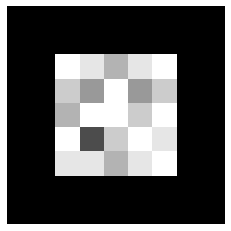

In [2]:
# Create an irregular random 2D signal
x = np.zeros((9, 9))
x[2:7, 2:7] = [[1.0, 0.9, 0.7, 0.9, 1.0],
               [0.8, 0.6, 1.0, 0.6, 0.8],
               [0.7, 1.0, 1.0, 0.8, 1.0],
               [1.0, 0.3, 0.8, 1.0, 0.9],
               [0.9, 0.9, 0.7, 0.9, 1.0]]
print(x)

# Plot it
plt.imshow(x, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
# == Q1 ==
# Crea una señal impulso (delta) en 2D. Usa un kernel de tamaño [3x3].
# Reporta la instrucción usada y la salida obtenida.
from scipy import signal
k = signal.unit_impulse((3, 3), 'mid')
print(k)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [4]:
# == Q2 ==
# Comprueba que la convolución con la señal impulso (delta) equivale al
# producto unitario, es decir, y = x = x*k, donde k=delta
# Esta comprobación puedes hacerla de manera práctica usando el siguiente código
# Usa la función convolve en scipy.ndimage. Reporta la combinación de parámetros
# que haya asegurado la equivalencia del producto unitario.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html
# También reporta la salida obtenida.

from scipy.ndimage import convolve
y = convolve(x,k,output=None,mode='wrap',cval=0.0, origin=0)
print(y)

#La combinación de parametros que aseguró la equivalencia del producto unitario
# es: output=None,mode='wrap',cval=0.0, origin=0

[[0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.9 0.7 0.9 1.  0.  0. ]
 [0.  0.  0.8 0.6 1.  0.6 0.8 0.  0. ]
 [0.  0.  0.7 1.  1.  0.8 1.  0.  0. ]
 [0.  0.  1.  0.3 0.8 1.  0.9 0.  0. ]
 [0.  0.  0.9 0.9 0.7 0.9 1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


[[0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.9 0.7 0.9 1.  0.  0. ]
 [0.  0.  0.8 0.6 1.  0.6 0.8 0.  0. ]
 [0.  0.  0.7 1.  1.  0.8 1.  0.  0. ]
 [0.  0.  1.  0.3 0.8 1.  0.9 0.  0. ]
 [0.  0.  0.9 0.9 0.7 0.9 1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


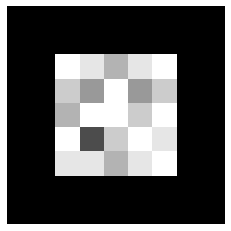

Rate of pixels with same value in x and y: 100.0%


In [5]:
# Import the convolution function and convolve x and h
from scipy.ndimage import convolve
y = convolve(x,k,output=None,mode='wrap',cval=0.0, origin=0)
print(y)

# Plot it
plt.imshow(y, cmap='gray')
plt.axis('off')
plt.show()

# Comprobación AQUÍ
print(f"Rate of pixels with same value in x and y: {100*(x == y).sum() / (x.shape[0] * x.shape[1])}%")

[[0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.9 0.7 0.9 1.  0.  0.  0. ]
 [0.  0.8 0.6 1.  0.6 0.8 0.  0.  0. ]
 [0.  0.7 1.  1.  0.8 1.  0.  0.  0. ]
 [0.  1.  0.3 0.8 1.  0.9 0.  0.  0. ]
 [0.  0.9 0.9 0.7 0.9 1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


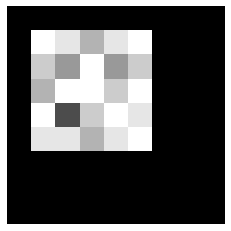

Rate of pixels with same value in x and y: 60.49382716049383%


In [6]:
# Revisa la documentación de convolve y verifíca qué pasa si modificamos los
# valores de los parámetros. Concretamente:

# == Q3 == ¿Qué impacto tiene modificar mode? -- Muestra un ejemplo.
# Cambiar mode impacta la extensión de la imagen para la aplicacion del kernel,
# el comportamiento con las celdas fuera de los limites de la imagen.

from scipy.ndimage import convolve
y = convolve(x,k,output=None,mode='reflect',cval=0.0, origin=1)
print(y)

# Plot it
plt.imshow(y, cmap='gray')
plt.axis('off')
plt.show()

# Comprobación AQUÍ
print(f"Rate of pixels with same value in x and y: {100*(x == y).sum() / (x.shape[0] * x.shape[1])}%")


[[0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.9 0.  0.  1.  0.9 0.7 0.9 1.  0. ]
 [0.9 0.  0.  0.8 0.6 1.  0.6 0.8 0. ]
 [0.9 0.  0.  0.7 1.  1.  0.8 1.  0. ]
 [0.9 0.  0.  1.  0.3 0.8 1.  0.9 0. ]
 [0.9 0.  0.  0.9 0.9 0.7 0.9 1.  0. ]
 [0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9]]


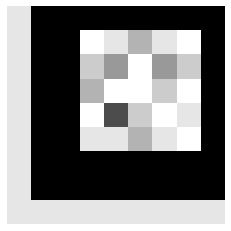

Rate of pixels with same value in x and y: 44.44444444444444%


In [7]:
# == Q4 == ¿Qué impacto tiene modificar cval? -- Muestra un ejemplo.
#Al elegir el modo 'constant' cval indica el valor de los pixeles de la imagen
#cuando se extienden sus limites para aplicar el filtro
from scipy.ndimage import convolve
y = convolve(x,k,output=None,mode='constant',cval=.9, origin=(1,-1))
print(y)

# Plot it
plt.imshow(y, cmap='gray')
plt.axis('off')
plt.show()

# Comprobación AQUÍ
print(f"Rate of pixels with same value in x and y: {100*(x == y).sum() / (x.shape[0] * x.shape[1])}%")


[[0.  0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  1.  0.9 0.7 0.9 1.  0.  0.  0.5]
 [0.  0.8 0.6 1.  0.6 0.8 0.  0.  0.5]
 [0.  0.7 1.  1.  0.8 1.  0.  0.  0.5]
 [0.  1.  0.3 0.8 1.  0.9 0.  0.  0.5]
 [0.  0.9 0.9 0.7 0.9 1.  0.  0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]]


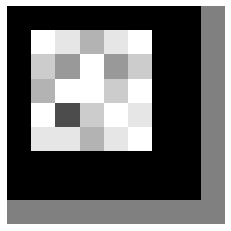

Rate of pixels with same value in x and y: 39.50617283950617%


In [8]:
# == Q5 == ¿Qué impacto tiene modificar origin? -- Muestra un ejemplo.
#Cambia la posicion de origen del filtro, si se escribe solo un numero se mueve
#ese numero de pixeles en todas las dimensiones de la imagen, si se aplica una
#tupla del mismo tamaño que el numero de dimensiones, en cada dimension se mueve
#el numero de pixeles que se indique

from scipy.ndimage import convolve
y = convolve(x,k,output=None,mode='constant',cval=.5, origin=(1,1))
print(y)

# Plot it
plt.imshow(y, cmap='gray')
plt.axis('off')
plt.show()

# Comprobación AQUÍ
print(f"Rate of pixels with same value in x and y: {100*(x == y).sum() / (x.shape[0] * x.shape[1])}%")

# Parte 2

In [9]:
# Load image and print some info
from skimage import data
from skimage import color
IMG = color.rgb2gray(data.astronaut()) # Loads image in gray-scale mode

print(f"Astronaut image of size [{IMG.shape[0]}x{IMG.shape[1]}] pixels.")
print(f"Min and max pixel values = [{IMG.min()}, {IMG.max()}]")

Astronaut image of size [512x512] pixels.
Min and max pixel values = [0.0, 1.0]


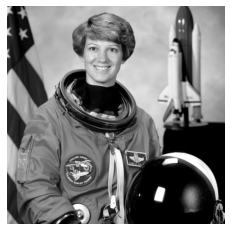

Average intensity: 0.44+-0.30


In [10]:
# Plot it
plt.imshow(IMG, cmap='gray')
plt.axis('off')
plt.show()
print(f"Average intensity: {IMG.mean():4.2f}+-{IMG.std():4.2f}")

In [11]:
# == Q6 ==
# Define an average kernel of size [5x5] and convolve the image with it.
# Reporta el kernel que hayas usado.
# Make sure the intensity values of the resulting image are within the interval
# [0.0, 1.0]
AVk = np.full((5, 5), 1/25) 

#El Kernel usado es 
#[[0.04 0.04 0.04 0.04 0.04]
# [0.04 0.04 0.04 0.04 0.04]
# [0.04 0.04 0.04 0.04 0.04]
# [0.04 0.04 0.04 0.04 0.04]
# [0.04 0.04 0.04 0.04 0.04]]
#Porque 1/25 = .04

AVy = convolve(IMG, AVk, output=None, mode='constant') #OTHER PARAMETERS HERE)
#print(AVy)
print(f"Convolved-Astronaut image of size [{AVy.shape[0]}x{AVy.shape[1]}] pixels.")
print(f"Min and max pixel values = [{AVy.min()}, {AVy.max()}]")

Convolved-Astronaut image of size [512x512] pixels.
Min and max pixel values = [0.0, 0.9969862745098041]


In [12]:
# == Q7 ==
# La función scipy.ndimage.convolve es una función propia para imágenes, a
# diferencia de scipy.signal.convolve2d, la cual es una función genérica para
# señales 2D. Revisa la documentación de ambas y compara sus salidas.
# ¿Cuáles son sus diferencias?

# La diferencia de las salidas, es que en el caso de señales 2D el resultado es 
# un arreglo 2D que contiene un subconjunto de las convoluciones entre las 
# entradas. En cambio, la función propia para imágenes da como resultado una 
# convolución de la entrada con un kernel de pesos.

In [13]:
# == Q8 ==
# Imprime el valor de AVk usado anteriormente y explica por qué es constante
# para todos sus elementos y por qué se usa justamente ese valor.
print(AVk)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


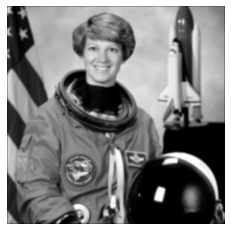

Average intensity: 0.44+-0.29


In [14]:
# Plot convolved image
plt.imshow(AVy, cmap='gray')
plt.axis('off')
plt.show()
print(f"Average intensity: {AVy.mean():4.2f}+-{AVy.std():4.2f}")

In [15]:
# == Q9 ===
# Encuentra la forma de aplicar la convolución repetidamente sobre la imagen
# hasta que la variación promedio entre las intensidades de los pixeles sea
# menor o igual a 0.15.
# Reporta el pseudocódigo (o código) usado para este procedimiento. También
# reporta cuántas convoluciones repetidas requeriste.
from scipy import stats
num_inter = 5000
std_dev = np.zeros((num_inter, 1))
for ind in range(num_inter):
    ant=AVy
    AVy = convolve(ant, AVk, output=None, mode='constant') #OTHER PARAMETERS HERE)
    std_dev[ind]=AVy.std()
    if std_dev[ind]<0.15:
      break
    
print(ind, std_dev[ind])


3770 [0.14999325]


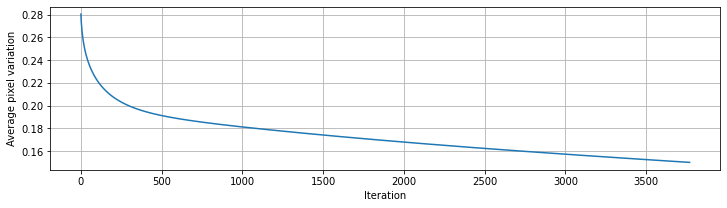

In [16]:
# == Q10 ==
# Grafica la variación promedio histórica de las intensidades de los pixeles
plt.figure(figsize=(12, 3))
plt.plot(std_dev[:ind])
plt.xlabel('Iteration')
plt.ylabel('Average pixel variation')
plt.grid()
plt.show()

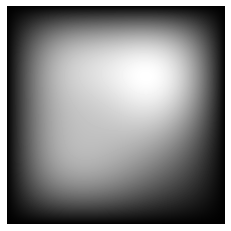

Average intensity: 0.24+-0.15
Min and max pixel values = [3.187726056213797e-05, 0.522220796260569]


In [17]:
# Plot final convolved image
plt.imshow(AVy, cmap='gray')
plt.axis('off')
plt.show()
print(f"Average intensity: {AVy.mean():4.2f}+-{AVy.std():4.2f}")
print(f"Min and max pixel values = [{AVy.min()}, {AVy.max()}]")

In [18]:
# == Q11 ==
# ¿Qué relación encuentras entre los resultados de las convoluciones repetidas y
# el Teorema del Límite Central (tendrás que investigar qué dice el teorema si no
# lo conoces -- No worries, es muy sencillo e intuitivo).

# El teorema de limite central nos dice que con una N lo suficientemente grande
# los datos tienden a distribuirse aproximadamente normal.
# Al realizar repetidas veces las convoluciones la imagen se modifica y la 
# intensidad de los pixeles se llega a distribuir aproximadamente normal en
# dos dimensiones

# Parte 3

Column Kernel:
 [[0.00443305]
 [0.05400558]
 [0.24203623]
 [0.39905028]
 [0.24203623]
 [0.05400558]
 [0.00443305]]
Matrix kernel:
 [[1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [1.76900911e-03 2.15509428e-02 9.65846250e-02 1.59241126e-01
  9.65846250e-02 2.15509428e-02 1.76900911e-03]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]]


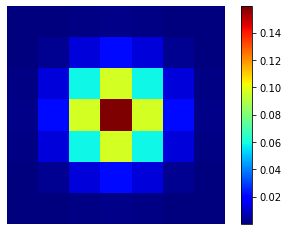

In [19]:
# Create a 2D Gaussian filter
import cv2 # importa opencv
kernel = cv2.getGaussianKernel(7, 1)
print(f"Column Kernel:\n {kernel}")

GSSk = np.outer(kernel, kernel.transpose())
print(f"Matrix kernel:\n {GSSk}")

plt.imshow(GSSk, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

In [20]:
# == Q12 ==
# ¿Qué hace la función np.outer?
# Realiza el producto entre dos matrices, dando dos vectores estos al 
# ser multiplicados generan una matriz de n renglones por m columnas.
# En la operación anterior vemos el kernel columna de 7x1 que es 
# operado con su transpuesto, de 1x7, generando una matriz 7x7

In [21]:
# Now create a Gaussian kernel of size [3x3], and convolve it with the image
kernel = cv2.getGaussianKernel(3, 2)
GSSk = np.outer(kernel, kernel.transpose())
print(f"Matrix kernel:\n {GSSk}")
GSSy = convolve(IMG, GSSk, mode='wrap')

print(f"\nConvolved-Astronaut image of size [{GSSy.shape[0]}x{GSSy.shape[1]}] pixels.")
print(f"Min and max pixel values = [{GSSy.min()}, {GSSy.max()}]")

Matrix kernel:
 [[0.10186806 0.11543164 0.10186806]
 [0.11543164 0.13080118 0.11543164]
 [0.10186806 0.11543164 0.10186806]]

Convolved-Astronaut image of size [512x512] pixels.
Min and max pixel values = [0.0, 0.9985060677155607]


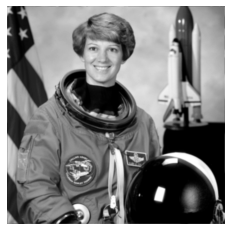

Average intensity: 0.44+-0.29


In [22]:
# Plot convolved image
plt.imshow(GSSy, cmap='gray')
plt.axis('off')
plt.show()
print(f"Average intensity: {GSSy.mean():4.2f}+-{GSSy.std():4.2f}")

In [23]:
# == Q12 ==
# Explica qué hace la siguiente función
def salt_and_pepper(IMG):
    img = IMG.copy()
    n_rows, n_cols = img.shape
    for row in range(n_rows):
        for col in range(n_cols):
            thresh = np.random.rand()
            if thresh > 0.95:
                img[row, col] = 1
            elif thresh < 0.05:
                img[row, col] = 0
    return img
  
# La función realiza una copia de una imagen dada. Con esta, itera sobre cada 
# pixel haciendo una operación aleatoria. Cuando el valor aleatorio de esta es 
# mayor a 0.95, se cambia el valor del pixel a 1. En cambio, si es menor a 0.05 
# el valor del pixel se convierte en 0. 

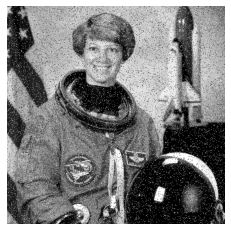

Average intensity: 0.45+-0.32
Min and max pixel values = [0.0, 1.0]
There is 4.98% of pixels average variation.


In [24]:
# Create a varying copy of the image
nIMG = salt_and_pepper(IMG)
plt.imshow(nIMG, cmap='gray')
plt.axis('off')
plt.show()
print(f"Average intensity: {nIMG.mean():4.2f}+-{nIMG.std():4.2f}")
print(f"Min and max pixel values = [{nIMG.min()}, {nIMG.max()}]")
print(f"There is {100 * np.abs((IMG - nIMG)).sum() / (IMG.shape[0] * IMG.shape[1]):4.2f}% of pixels average variation.")

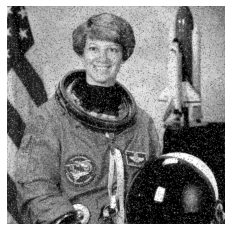

There is 3.76% of pixels average variation.


In [25]:
# Create a Gaussian kernel and apply it on the modified image (nIMG)
kernel = cv2.getGaussianKernel(3, 0.5)
Gk = np.outer(kernel, kernel.transpose())
Go = convolve(nIMG, Gk, mode='wrap')

# Plot convolved image
plt.imshow(Go, cmap='gray')
plt.axis('off')
plt.show()
print(f"There is {100 * np.abs((Go - nIMG)).sum() / (Go.shape[0] * Go.shape[1]):4.2f}% of pixels average variation.")

In [26]:
# == Q14 ==
# Acabamos de crear un kernel Gaussiano de 3x3 pixeles con desviación estándar = 0.5.
# Anteriormente habíamos hecho uno de 7x7 pixeles con desviación estándar = 1.
# Investiga cuál es el impacto de la desviación estándar en la creación de una función
# Gaussiana, y su relación con el tamaño del kernel.

# La desviacion estandar determina el ancho de la campana de Gauss, por lo que
# afecta el tamaño del Kernel a usar.

# Parte 4

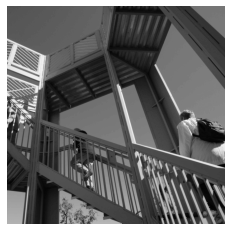

In [27]:
# Border/Edge detection
from scipy import misc
IMG2 = misc.ascent()
IMG2 = IMG2 - IMG2.min()
IMG2 = IMG2 / IMG2.max()

# Plot image
plt.imshow(IMG2, cmap='gray')
plt.axis('off')
plt.show()

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


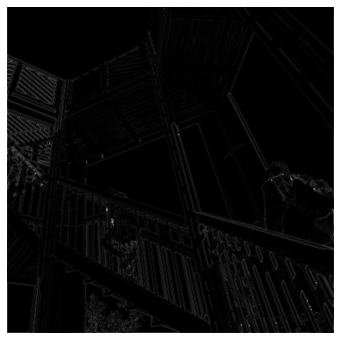

In [28]:
# Laplacian line detector
Lapk = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
print(Lapk)
Lapy = convolve(IMG2, Lapk, mode='constant')

# Plot convolved image
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(Lapy), cmap='gray')
plt.axis('off')
plt.show()

In [29]:
# Resulta que el Laplaciano es muy sensible al ruido, por lo que normalmente
# la imágen es suavizada primero mediante un filtro Gaussiano, y el Laplaciano
# se aplica sobre la imagen ya suavizada

Convolucion kernel Gaussiano con Laplaciano

[[-0.05606021]
 [ 0.11212043]
 [-0.05606021]]




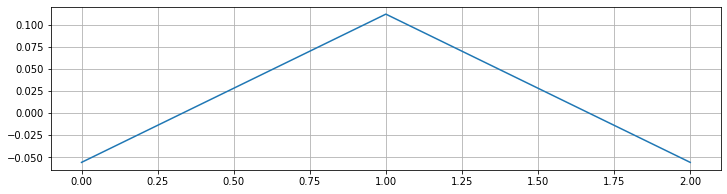

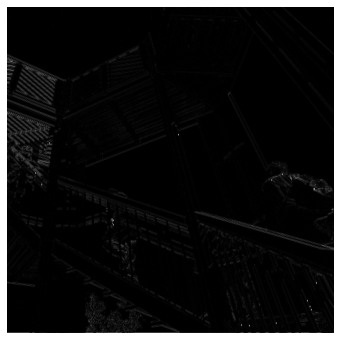

In [30]:
# == Q15 == 
# Usando las propiedades de la convolución, crea un kernel "Laplacian of Gaussian (LoG)",
# el cual es el Laplaciano del Gaussiano (puedes googlear su definición matemática).
# Créalo para disminuir el número de convoluciones requeridas, es decir, realiza la 
# convolución de un kernel Gaussiano con uno Laplaciano, y el resultado aplícalo a la imagen.
# a) Imprímelo.
Gauk = cv2.getGaussianKernel(3, 3)
Lapk = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
GaLak = convolve(Gauk, Lapk)
print('Convolucion kernel Gaussiano con Laplaciano\n')
print(GaLak)
print('\n')
# b) Grafícalo.
plt.figure(figsize=(12, 3))
plt.plot(GaLak)
plt.grid()
plt.show()
# c) Aplícalo sobre la imagen de las escaleras.
Lapy = convolve(IMG2, GaLak, mode='constant')
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(Lapy), cmap='gray')
plt.axis('off')
plt.show()
# d) ¿Notas alguna diferencia respecto a la salida de la celda anterior?
# Si, la imagen tiene menos líneas blancas y más secciones oscuras 

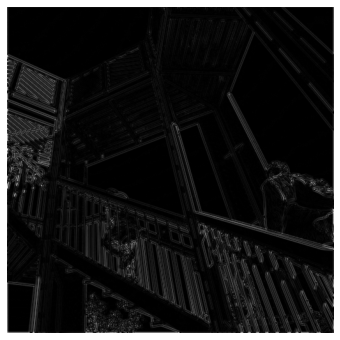

In [31]:
# Laplacian border detector: Gaussian + Laplacian
# Esta celda aplica primero el filtro Gaussiano y después el Laplaciano,
# nota que la pregunta pude crear un Laplaciano de Gaussiano, lo cual es
# ligeramente distinto a lo que hay en esta celda.
Gauk = cv2.getGaussianKernel(3, 1)
Gauk = np.outer(Gauk, Gauk.transpose())
Gauy = convolve(IMG2, Gauk, mode='constant')

Lapk = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
Lapy = convolve(Gauy, Lapk, mode='constant')

# Plot convolved image
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(Lapy), cmap='gray')
plt.axis('off')
plt.show()